In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Fraud_Data.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


The dataset consists of the following columns:

- user_id: Unique identifier for each user.
- signup_time: Time when the user signed up.
- purchase_time: Time when the user made the purchase.
- purchase_value: The value of the purchase.
- device_id: Unique identifier for the user's device.
- source: The traffic source (e.g., SEO, Ads).
- browser: The browser used (e.g., Chrome, Opera, Safari).
- sex: Gender of the user (M/F).
- age: Age of the user.
- ip_address: IP address of the user.
- class: Target variable indicating fraud (1) or no fraud (0).

In [3]:
# check for missing values
df.isnull().sum()

user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64

**Observation**:From the code result above, it can be seen that this dataset doesn't have any missing values. Therefore the dataset might not need data cleaning

In [4]:
# a brief overview of the dataset
df.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


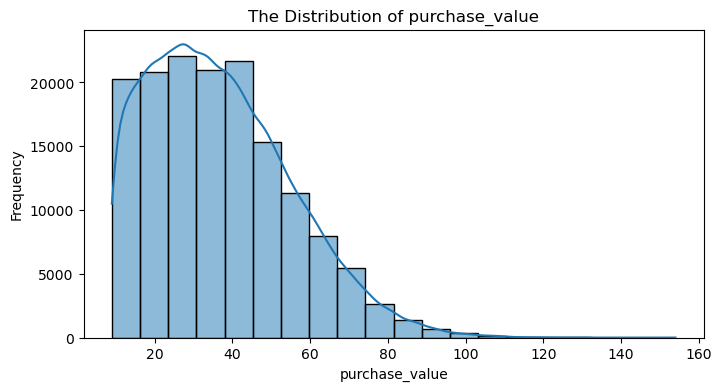

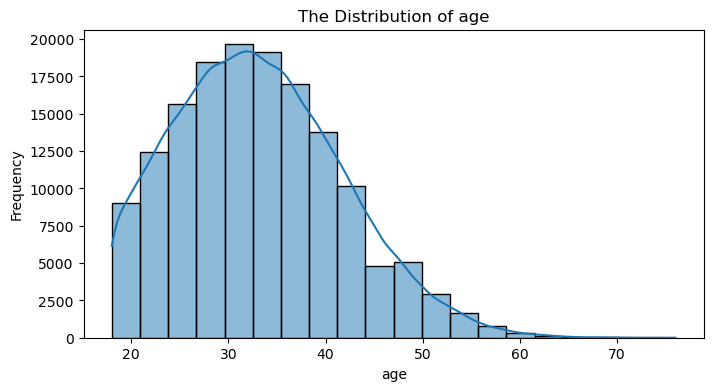

In [6]:
# Univariate Analysis 

# A Histogram of the numerical columns
num_col = ['purchase_value', 'age']

for col in num_col:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f"The Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**Observation**

The Distribution of the purchase_value

- This histogram shows how purchase values are distributed across customers
- The x-axis ranges from around 0 to 160 (presumably in some currency unit)
- The y-axis shows frequency (number of occurrences)

- The distribution is right-skewed (has a long tail to the right)
- Most purchases cluster between 20-60 units
- The peak frequency is around 20,000 occurrences at the 30-40 range
- There are fewer high-value purchases, tapering off after 80 units
- Very few purchases exceed 100 units


The Distribution of age:

- This histogram shows the age distribution of customers
- The x-axis ranges from approximately 20 to 70 years old
- The y-axis shows frequency (number of customers)

- The distribution appears more normally distributed (bell-shaped) compared to purchase value
- The peak age group is around 30-35 years old
- Most customers are between 25-45 years old
- There's a gradual decline in frequency for older age groups
- Very few customers are above 60 years old. The customer base appears to be predominantly young to middle-aged adults

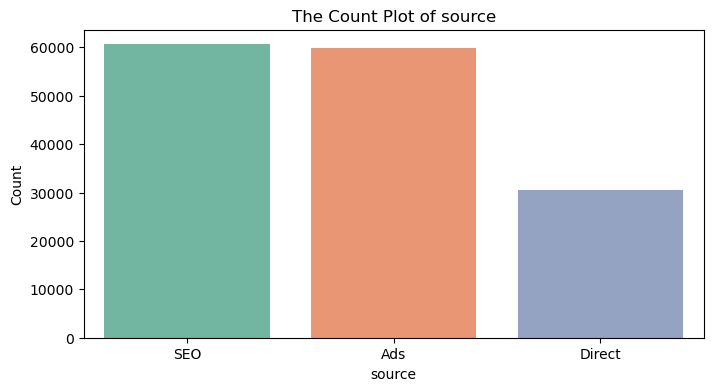

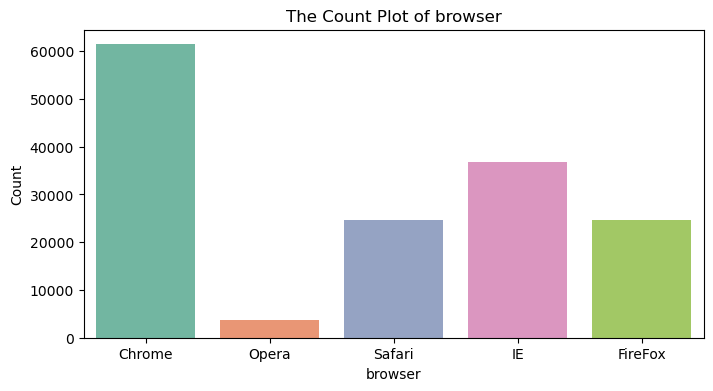

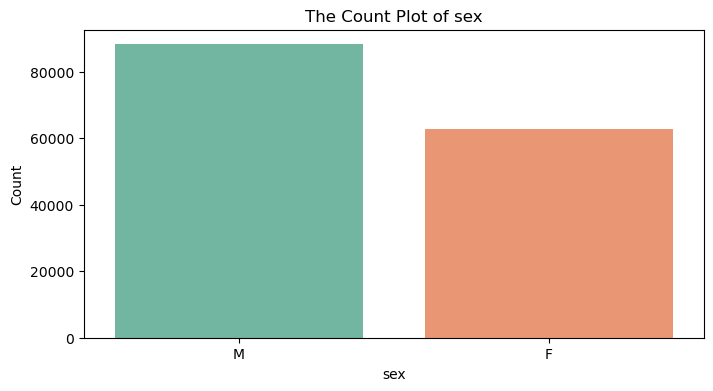

In [24]:
# A count plot for the categorical columns
cat_col = ["source", "browser", "sex"]

for col in cat_col:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f"The Count Plot of {col}")
    plt.ylabel("Count")
    plt.show()

**Observations**

Distribution of Traffic Sources:

- SEO (Search Engine Optimization): ~60,000 visitors
- Ads (Paid Advertising): ~58,000 visitors
- Direct Traffic: ~30,000 visitors

From the chart above, it can be seen that SEO and Ads are the dominant traffic sources, with very similar numbers.

Organic search (SEO) slightly outperforms paid advertising

Direct traffic accounts for about half the volume of either SEO or Ads


The Distribution of The Browser Usage


This bar chart shows the breakdown of web browsers used by visitors
Five browsers are represented:
- Chrome is clearly the dominant browser, with nearly twice the usage of the next closest competitor
- IE holds a strong second position
- Safari and Firefox have similar usage levels
- Opera has notably low usage compared to other browsers


For the User Sex Count, it can be observed that there are more male users than their female counterparts


# Bivariate Analysis

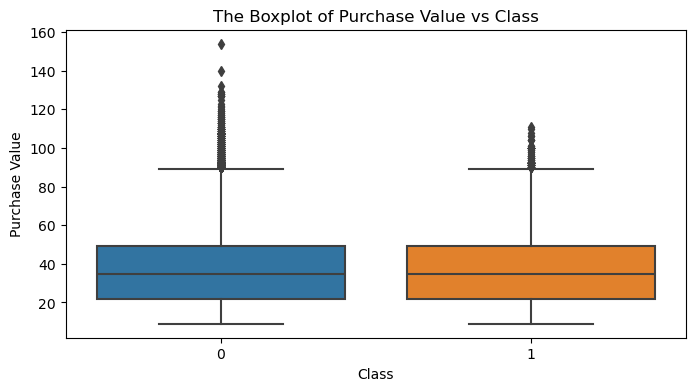

In [10]:
# A boxplot of purchase_value vs class
plt.figure(figsize=(8,4))
sns.boxplot(x="class", y="purchase_value", data=df)
plt.title("The Boxplot of Purchase Value vs Class")
plt.xlabel("Class")
plt.ylabel("Purchase Value")
plt.show()

**Observation** 

The Purchase Value vs Fraud Class (Boxplot):


Class 0 (likely legitimate transactions) and Class 1 (likely fraudulent) show similar distributions. 
They both have these:

- Median purchase values around 30-40 units
- Similar spreads (interquartile ranges)
- Outliers extending up to about 150 units


This suggests purchase value alone may not be a strong indicator of fraud

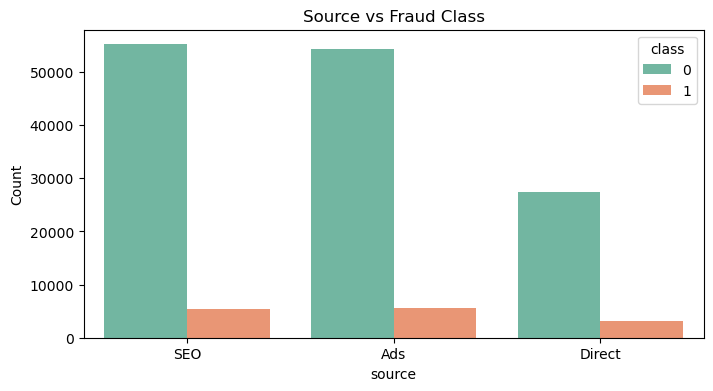

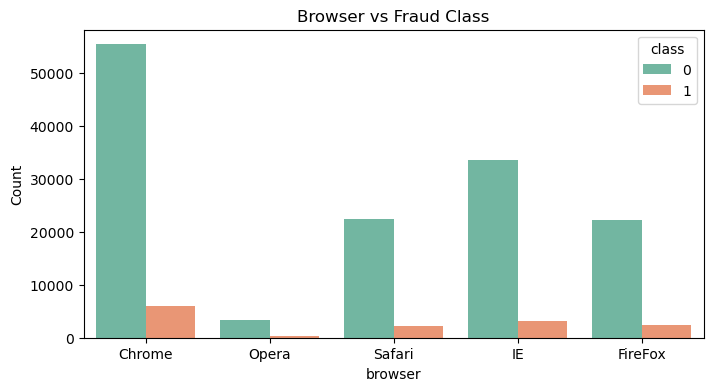

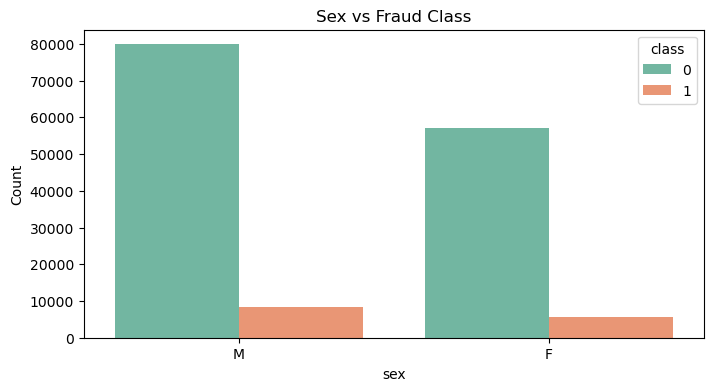

In [25]:
data = df
data['class'] = df['class'].astype(str)

# Now plot the count plots for categorical variables vs fraud class
categorical_columns = ['source', 'browser', 'sex']

for col in categorical_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, hue='class', data=data, palette='Set2')
    plt.title(f'{col.capitalize()} vs Fraud Class')
    plt.ylabel('Count')
    plt.show()


**Observation**

Source vs Fraud Class:
This shows distribution of fraud across different traffic sources, and they show significantly more legitimate (Class 0) than fraudulent (Class 1) transactions


The Distribution of fraud:

- SEO: Highest volume of both legitimate and fraudulent transactions
- Ads: Similar to SEO in legitimate volume, slightly fewer fraudulent
- Direct: Lower overall volume but maintains similar fraud ratio


Browser vs Fraud Class:

Chrome has highest usage and highest number of fraudulent transactions

The browsers exhibits similar patterns:

Majority legitimate transactions (Class 0)
Small proportion of fraudulent transactions (Class 1), but the Opera shows lowest overall usage and fraud cases and IE and Firefox show moderate levels of both legitimate and fraudulent activity


Sex vs Fraud Class:

Shows gender distribution of fraudulent and legitimate transactions
Both genders show similar patterns:

- Males have higher overall transaction volume
- Fraudulent transactions (Class 1) are consistently lower for both genders


No single factor (browser, source, gender, or purchase value) appears to be a definitive indicator of fraud. 

This suggests fraud detection likely requires analyzing multiple factors in combination

In [21]:
# inspecting any presence of class imbalance

class_counts = df['class'].value_counts()
print(class_counts)

class
0    136961
1     14151
Name: count, dtype: int64


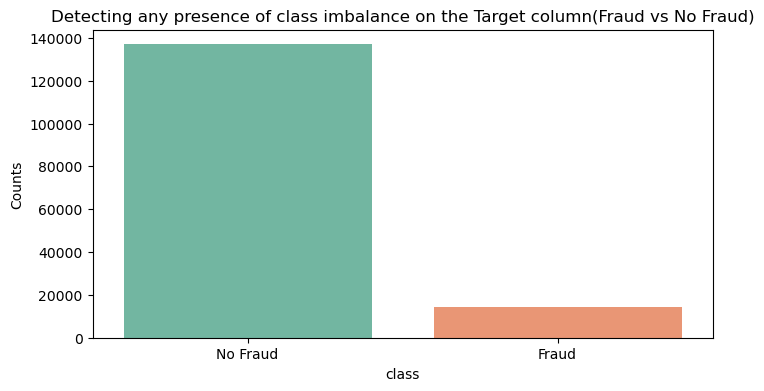

In [23]:
plt.figure(figsize=(8, 4))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Set2')
plt.title('Detecting any presence of class imbalance on the Target column(Fraud vs No Fraud)')
plt.ylabel('Counts')
plt.xticks([0,1], ['No Fraud', 'Fraud'])
plt.show()

**Observation**

No Fraud (Class 0):
Represents the vast majority of transactions

Fraud (Class 1):

Represents a much smaller portion of the total transactions


This imbalance can make it difficult for models to learn to detect fraud effectively

Models might be biased towards predicting the majority class (no fraud)

Standard accuracy metrics may be misleading